In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats




# Ayiti Analytics Probability and Statistics Project

Use all the files to have a final datasets to have the following columns
   <ul>
    <li>questid</li>
    <li>gender</li>
    <li>age (age of applicant)</li>
    <li>communeName (use data prep in commune file)</li>
    <li>application_date (created at in quest file)</li>
    <li>enroll_date (created_at in enroll file)</li>
    <li>is_enroll (Yes/No) (use data prep in enroll file)</li>
    <li>Education Level</li>
   <li>Communication channels(hear_AA1)</li>
    <li>Bootcamp Insterest (after_AA)</li>
    <li>Payement Date (use ord and transaction files)</li>
    <li>Payed (Yes/No)</li>
    <li>list Technologies as columns based (use get_dummies)</li>
    <li>list  Study domains (use get_dummies)</li>
    <li>Job is formal</li>
    <li>Have computer at home</li>
    <li>Have internet at home</li>
    
   </ul>
   

In [2]:
commune=pd.read_excel("commune.xlsx")
enroll = pd.read_csv("enroll.csv")
quest = pd.read_csv("quest.csv")
industry = pd.read_csv("industry.csv")
ord = pd.read_csv("ord.csv")
study_domain = pd.read_csv("study_domain.csv")
transaction = pd.read_csv("transaction.csv")
technology = pd.read_csv("technology.csv")

In [3]:
quest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
Unnamed: 0            250 non-null int64
gender                250 non-null object
dob                   244 non-null object
commune               250 non-null object
created_at            250 non-null object
modified_at           250 non-null object
department            249 non-null object
education_level       250 non-null object
university            250 non-null object
study_domain          250 non-null object
current_employed      250 non-null object
formal_sector_job     250 non-null object
have_computer_home    250 non-null object
internet_at_home      250 non-null object
hear_AA_1             250 non-null object
after_AA              250 non-null object
quest_id              250 non-null object
dtypes: int64(1), object(16)
memory usage: 33.3+ KB


In [4]:
quest['department'] = quest['department'].apply(lambda x  : str(x))
quest['department']= quest['department'].apply(lambda x : x.upper())
quest['commune']= quest['commune'].apply(lambda x : x.upper())
quest

merge1=pd.merge(quest,commune, how = 'left', left_on=['department','commune'], right_on=['ADM1_PCODE','Commune_Id'])
merge1

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,Port-au-Prince,Port-au-Prince,HT0111,West,HT01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,15/02/1994,HT0621,2021-03-02T18:39:19.873194Z,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,['other'],...,Yes,Yes,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,Mirebalais,Mirebalais,HT0621,Centre,HT06
246,246,male,08/10/1990,HT0621,2021-03-10T04:12:49.436154Z,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],...,Yes,Yes,Friend,Improving my data analysis skills,906b3c85-ce95-11eb-9b87-7c67a234f601,Mirebalais,Mirebalais,HT0621,Centre,HT06
247,247,male,28/12/1993,HT0621,2021-03-14T15:29:32.474015Z,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],...,Yes,Yes,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,Mirebalais,Mirebalais,HT0621,Centre,HT06
248,248,male,17/04/1992,HT0412,2021-03-08T16:35:07.806100Z,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,['item1'],...,Yes,Yes,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,Ferrier,Ferrier,HT0412,North-East,HT04


In [5]:

transaction['Paid'] = 'Yes'
ord['Paid'] = 'Yes'

x = transaction.loc[:,['Paid','user_id','created_at']]
y = ord.loc[:,['Paid','user_id','created_at']]
tr_ord= pd.concat([x,y],axis=0)
tr_ord= tr_ord.rename(columns={'created_at': 'Payment_Date'})
tr_ord.head()

,Paid,user_id,Payment_Date
0,Yes,40976440,2021-03-08T05:08:50.832Z
1,Yes,41179271,2021-03-08T17:26:35.841Z
2,Yes,40973512,2021-03-08T18:52:09.147Z
3,Yes,41177453,2021-03-08T19:06:32.837Z
4,Yes,40797121,2021-03-08T22:10:00.796Z


In [6]:
enroll.head()
enroll= enroll.rename(columns={'created_at': 'enroll_date'})
enroll['is_enroll'] = 'Yes'

merge2=pd.merge(enroll,tr_ord, how = 'left',on = ['user_id'] )
merge2= merge2.loc[:,['user_id','quest_id','enroll_date','Paid','Payment_Date','is_enroll']]
merge2

merge3=pd.merge(left=merge1,right=merge2, how = 'left', on=['quest_id'])
merge3['is_enroll']= merge3['is_enroll'].fillna('no')
merge3['Paid']= merge3['Paid'].fillna('no')
merge3.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE,user_id,enroll_date,Paid,Payment_Date,is_enroll
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,NaN,NaN,NaN,NaN,NaN,39726355.0,2021-02-14T23:15:19.500Z,no,NaN,Yes
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,40117659.0,2021-02-20T21:20:37.450Z,Yes,2021-03-03T23:00:11.974Z,Yes
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,Port-au-Prince,Port-au-Prince,HT0111,West,HT01,NaN,NaN,no,NaN,no


In [7]:
study_domain1 = pd.get_dummies(data=study_domain[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
study_domain1=study_domain1.groupby("quest_id").sum()
study_domain1
merge4=pd.merge(left=merge3,right=study_domain1, how = 'left', on=['quest_id'])
merge4

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,...,is_enroll,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
0,0,male,25/08/1998,HT0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NAN,unknown,unknown,[],...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,HT0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,HT01,Bachelors (bacc +4),other,['other'],...,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,male,17/05/1996,HT0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,HT01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,male,24/11/1996,HT0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,HT01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,no,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,male,20/07/1997,HT0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,HT01,High School (16 years),unknown,['other'],...,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,male,15/02/1994,HT0621,2021-03-02T18:39:19.873194Z,2021-03-02T18:39:19.873237Z,HT06,Bachelors (bacc +4),other,['other'],...,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
246,246,male,08/10/1990,HT0621,2021-03-10T04:12:49.436154Z,2021-03-10T04:12:49.436213Z,HT06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],...,no,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
247,247,male,28/12/1993,HT0621,2021-03-14T15:29:32.474015Z,2021-03-14T15:29:32.474055Z,HT06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],...,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
248,248,male,17/04/1992,HT0412,2021-03-08T16:35:07.806100Z,2021-03-08T16:35:07.806161Z,HT04,Bachelors (bacc +4),other,['item1'],...,Yes,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
technologyy = pd.get_dummies(data=technology[["quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
technologyyy=technologyy.groupby("quest_id").sum()
technologyyy
merge5=pd.merge(left=merge4,right=technologyyy, how = 'left', on=['quest_id'])
merge5
merge5.columns
columns_drop= ['Unnamed: 0','modified_at','current_employed','Commune_Id','Commune_FR','ADM1_PCODE','study_domain','department','university','commune']
result= merge5.drop(labels=None,columns=columns_drop, level=None, inplace=False)
merge5.columns

Index(['Unnamed: 0', 'gender', 'dob', 'commune', 'created_at', 'modified_at',
       'department', 'education_level', 'university', 'study_domain',
       'current_employed', 'formal_sector_job', 'have_computer_home',
       'internet_at_home', 'hear_AA_1', 'after_AA', 'quest_id', 'Commune_en',
       'Commune_FR', 'Commune_Id', 'Departement', 'ADM1_PCODE', 'user_id',
       'enroll_date', 'Paid', 'Payment_Date', 'is_enroll', 'Accounting',
       'Computer Science', 'Economics', 'Electrical Engineering', 'Law',
       'Management', 'Medicine', 'Statistics', 'other_x', 'Bash', 'Excel',
       'Git', 'Java', 'JavaScript', 'PHP', 'PowerBI or Tableau', 'Python', 'R',
       'SQL', 'VBA', 'other_y'],
      dtype='object')

In [12]:
result['dob'] = result['dob'].astype(str)

result['dob'].replace({'3 aout 1977':'03/08/1977'},inplace = True)
result['dob'] = pd.to_datetime(result['dob'])

def Calculate_Age(born) :
    today = date(2021, 6, 18)
    return today.year - born.year - ((today.month,today.day)< (born.month,born.day))

result['Age'] = result['dob'].apply(Calculate_Age)
result
lisst=['created_at','enroll_date','Payment_Date']
for i in lisst:
    result[i] =result[i].apply(lambda x : str(x).split("T")[0])

result.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 39 columns):
gender                    250 non-null object
dob                       244 non-null datetime64[ns]
created_at                250 non-null object
education_level           250 non-null object
formal_sector_job         250 non-null object
have_computer_home        250 non-null object
internet_at_home          250 non-null object
hear_AA_1                 250 non-null object
after_AA                  250 non-null object
quest_id                  250 non-null object
Commune_en                248 non-null object
Departement               248 non-null object
user_id                   102 non-null float64
enroll_date               250 non-null object
Paid                      250 non-null object
Payment_Date              250 non-null object
is_enroll                 250 non-null object
Accounting                244 non-null float64
Computer Science          244 non-null float64
Economics 

In [13]:
move = result.pop('Age')
result.insert(2,'Age',move)
result['Age'] = result['Age'].fillna(result['Age'].mean())
result['Age'] = result['Age'].astype(int)
result= result.drop(columns=['user_id','dob'],axis=1)
result

,gender,Age,created_at,education_level,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,...,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y
0,male,22,2021-02-14,unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female,24,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,male,25,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,male,24,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,male,23,2021-02-16,High School (16 years),unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,male,27,2021-03-02,Bachelors (bacc +4),Yes,Yes,Yes,Facebook,Improving my data analysis skills,906b3c84-ce95-11eb-8c2a-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,male,30,2021-03-10,Bachelors (bacc +4),Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c85-ce95-11eb-9b87-7c67a234f601,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
247,male,27,2021-03-14,Bachelors (bacc +4),Yes,Yes,Yes,Friend,Improving my data analysis skills,906b3c86-ce95-11eb-b6a7-7c67a234f601,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
248,male,29,2021-03-08,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,Improving my data analysis skills,906b65e2-ce95-11eb-8b5c-7c67a234f601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
cols=result.iloc[:,16:].columns
for i in cols:
    result[i]= result[i].fillna(0.0)
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 37 columns):
gender                    250 non-null object
Age                       250 non-null int32
created_at                250 non-null object
education_level           250 non-null object
formal_sector_job         250 non-null object
have_computer_home        250 non-null object
internet_at_home          250 non-null object
hear_AA_1                 250 non-null object
after_AA                  250 non-null object
quest_id                  250 non-null object
Commune_en                248 non-null object
Departement               248 non-null object
enroll_date               250 non-null object
Paid                      250 non-null object
Payment_Date              250 non-null object
is_enroll                 250 non-null object
Accounting                250 non-null float64
Computer Science          250 non-null float64
Economics                 250 non-null float64
Electrical Engineer

###  1. How many observations and variables are there in the dataset
 

In [15]:
# here your codes
result.shape
print('The number of observations in the dataset is:',result.shape[0])
print('The number of variables in the dataset is:',result.shape[1])

The number of observations in the dataset is: 250
The number of variables in the dataset is: 37


### 2.A Calculate the average age of the observations
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset
### 2.B Calculate 
   * variance of the whole datatset,male and female
   * kurtosis of the whole datatset,male and female
   * skewness of the whole datatset,male and female
### 2.C Does the age distribution follow a normal distribution 
   

In [16]:
# here your codes
# 2.A Calculate the average age of the observations¶
avg=result['Age'].mean()
print('The average age of the observations in the whole dataset is', np.round(avg,2), 'years old')
avg_male=result[result['gender']== 'male'].Age.mean()
print('The average age of the observations for the male is', np.round(avg_male,2), 'years old')
avg_female=result[result['gender']== 'female'].Age.mean()
print('The average age of the observations for the female is', np.round(avg_female,2), 'years old','\n')
# 2.B Calculate
# variance of the whole datatset,male and female
var=result['Age'].var()
print('The age variance of the observations in the whole dataset is', np.round(var,2))
var_male=result[result['gender']== 'male'].Age.var()
print('The age variance of the observations for the male is', np.round(var_male,2))
var_female=result[result['gender']== 'female'].Age.var()
print('The age variance  of the observations for the female is', np.round(var_female,2),'\n')
# kurtosis of the whole datatset,male and female
kurtosis=result['Age'].kurtosis()
print('The kurtosis of the age distribution the whole dataset is', np.round(kurtosis,2))
kurtosis_male=result[result['gender']== 'male'].Age.kurtosis()
print('The kurtosis of the age distribution for the male is', np.round(kurtosis_male,2))
kurtosis_female=result[result['gender']== 'female'].Age.kurtosis()
print('The kurtosis of the age distributionfor the female is', np.round(kurtosis_female,2),'\n')
# skewness of the whole datatset,male and female
skewness=result['Age'].skew()
print('The skewness age of the distribution in the whole dataset is', np.round(skewness,2))
skewness_male=result[result['gender']== 'male'].Age.skew()
print('The skewness age of the distribution for the male is', np.round(skewness_male,2))
skewness_female=result[result['gender']== 'female'].Age.skew()
print('The skewness age of the distribution for the female is', np.round(skewness_female,2),'\n')

The average age of the observations in the whole dataset is 26.73 years old
The average age of the observations for the male is 27.04 years old
The average age of the observations for the female is 25.36 years old 

The age variance of the observations in the whole dataset is 50.64
The age variance of the observations for the male is 49.15
The age variance  of the observations for the female is 55.93 

The kurtosis of the age distribution the whole dataset is 5.18
The kurtosis of the age distribution for the male is 5.4
The kurtosis of the age distributionfor the female is 5.26 

The skewness age of the distribution in the whole dataset is -0.72
The skewness age of the distribution for the male is -0.71
The skewness age of the distribution for the female is -0.75 



In [17]:
#Testing the distribution for normality
from scipy.stats import shapiro
print("Shapiro-Wilk Test for whole dataset: ",shapiro(result['Age']))
print("Shapiro-Wilk Test for whole dataset: ",shapiro(result[result['gender']== 'male'].Age))
print("Shapiro-Wilk Test for whole dataset: ",shapiro(result[result['gender']== 'female'].Age))

Shapiro-Wilk Test for whole dataset:  (0.8524620532989502, 1.0272336163652009e-14)
Shapiro-Wilk Test for whole dataset:  (0.8597859144210815, 1.0245068682301905e-12)
Shapiro-Wilk Test for whole dataset:  (0.8064625859260559, 2.221895783804939e-06)


### 3.Display the age frequency disbrution
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset

In [45]:
bins = 50
sns.displot(result['Age'],bins = bins,kde = True)

AttributeError: module 'seaborn' has no attribute 'displot'

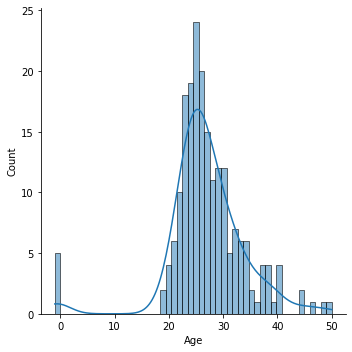

In [32]:
sns.displot(final_tab[final_tab['gender']== 'male'].Age, bins = bins,kde = True)

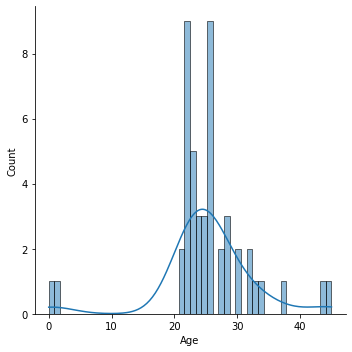

In [33]:
sns.displot(final_tab[final_tab['gender']== 'female'].Age,bins= bins,kde = True)

### 4. Can we say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp. Justify your answer

In [19]:
#here your codes
# H0 : Mu = 24 
# H1 : Mu != 24
from scipy.stats import wilcoxon
stat, p = wilcoxon(result.Age - 24)
print('Statistics=%.2f, p=%.2f' % (stat, p))
# interpretation
alpha = 0.05
if p > alpha:
	print('ho mu=24 (fail to reject H0)')
else:
	print('h1 mu!= 24 (reject H0)')

Statistics=5282.50, p=0.00
h1 mu!= 24 (reject H0)


### 5. Calculate the average age of participants for each communication channel

In [31]:
AverAge=result.groupby('hear_AA_1')['Age'].mean()
AverAge.to_frame()

,Age
hear_AA_1,
Ayiti Analytics Website,27.200000
Bootcamp Alumni,26.642857
ESIH,23.777778
Facebook,26.275000
Friend,26.835821
Instagram,25.400000
LinkedIn,30.200000
WhatsApp,26.727273
other,28.666667


### 6. Display an age boxplot for each communication channel

Text(0.5, 1.0, 'Boxplot of applicants by communication channels')

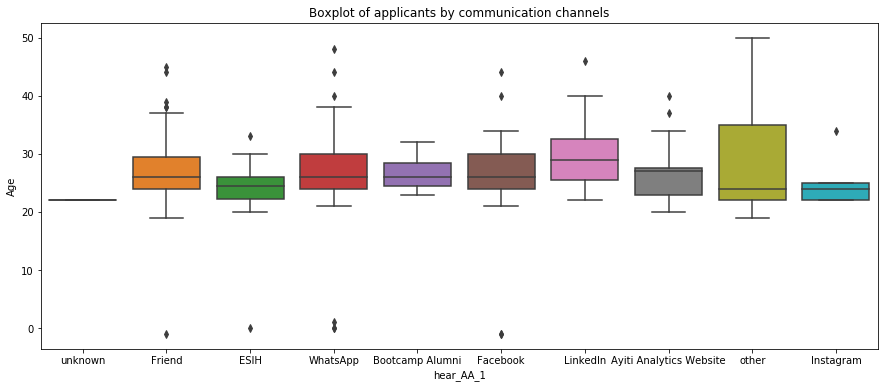

In [20]:
#here your codes
plt.figure(figsize=(15,6))
sns.boxplot(data=result,x="hear_AA_1",y="Age")
plt.title('Boxplot of applicants by communication channels')

In [21]:
#here your codes
display( result['Age'].groupby(by= result['hear_AA_1']).mean())

hear_AA_1
Ayiti Analytics Website    27.200000
Bootcamp Alumni            26.642857
ESIH                       23.777778
Facebook                   26.275000
Friend                     26.835821
Instagram                  25.400000
LinkedIn                   30.200000
WhatsApp                   26.727273
other                      28.666667
unknown                    22.000000
Name: Age, dtype: float64

### 7 .Is there a significant age difference between these groups

In [22]:
Facebook_list_age = result[result['hear_AA_1'] == 'Facebook']['Age'].values
Unknown_list_age = result[result['hear_AA_1'] == 'unknown']['Age'].values
Friend_list_age = result[result['hear_AA_1'] == 'Friend']['Age'].values
ESIH_list_age = result[result['hear_AA_1'] == 'ESIH']['Age'].values
WhatsApp_list_age = result[result['hear_AA_1'] == 'WhatsApp']['Age'].values
Bootcamp_Alumni_list_age = result[result['hear_AA_1'] == 'Bootcamp Alumni']['Age'].values
LinkedIn_list_age = result[result['hear_AA_1'] == 'LinkedIn']['Age'].values
Ayiti_Analytics_Website_list_age = result[result['hear_AA_1'] == 'Ayiti Analytics Website']['Age'].values
other_list_age = result[result['hear_AA_1'] == 'other']['Age'].values
Instagram_list_age = result[result['hear_AA_1'] == 'Instagram']['Age'].values




In [28]:
#here your codes
# Ho : There is no difference between the mean of these groups
# h1 : There is a difference between the mean of these groups

stat, p =  stats.f_oneway(Facebook_list_age, Unknown_list_age, Friend_list_age, ESIH_list_age, WhatsApp_list_age, Bootcamp_Alumni_list_age, LinkedIn_list_age, Ayiti_Analytics_Website_list_age, other_list_age, Instagram_list_age)
print(p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")


0.5194579996223385
Hypothesis Accepted


### 8.Plan a BA strategy for each communication channel regarding the age group

In [32]:
#here your codes
AverAge.to_frame()

,Age
hear_AA_1,
Ayiti Analytics Website,27.200000
Bootcamp Alumni,26.642857
ESIH,23.777778
Facebook,26.275000
Friend,26.835821
Instagram,25.400000
LinkedIn,30.200000
WhatsApp,26.727273
other,28.666667


### 9.According to the observations what is the probability of being in each channel of communication knowing your are a woman

In [ ]:
#here your codes
res =result5.gender.value_counts(normalize=True).to_frame()
display(res)
gender_table = pd.pivot_table(result5,'age1',index='hear_AA_1',columns=['gender'],aggfunc = ['count'],fill_value=0)
my_pivot = gender_table.sort_values(by= ('count','female'),ascending = False)
my_pivot['Probabilty of being female and being in each communications channels'] =gender_table[('count','female')]/result5.shape[0]
my_pivot['Probabilty of being male and being in each communications channels'] = gender_table[('count','male')]/result5.shape[0]
my_pivot=my_pivot.loc[:,['Probabilty of being female and being in each communications channels','Probabilty of being male and being in each communications channels']]
display(my_pivot)
my_pivot['male'] =my_pivot['Probabilty of being male and being in each communications channels']/ res.loc["male","gender"]
my_pivot['female'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["female","gender"]
my_pivot.loc[:,['female']]

### 10.According to the observations what is the probability of being in each channel of communication knowing your are a man

In [146]:
#here your codes
my_pivot.loc[:,['male']]

,male
gender,
hear_AA_1,
Friend,0.275862
WhatsApp,0.280788
Bootcamp Alumni,0.029557
Facebook,0.167488
ESIH,0.064039
Ayiti Analytics Website,0.054187
other,0.034483
Instagram,0.019704


### 11. Deduce the probability of being a woman knowing each communication channel

In [34]:
#here your codes
#here your codes
gender_table = pd.crosstab(result.gender, result["hear_AA_1"], margins=True, normalize="columns")
for col in gender_table.columns:
  print(f"The proba of being a woman knowing knowing {col} is: {round(gender_table.at['female', col], 3)}")

The proba of being a woman knowing knowing Ayiti Analytics Website is: 0.267
The proba of being a woman knowing knowing Bootcamp Alumni is: 0.571
The proba of being a woman knowing knowing ESIH is: 0.278
The proba of being a woman knowing knowing Facebook is: 0.15
The proba of being a woman knowing knowing Friend is: 0.164
The proba of being a woman knowing knowing Instagram is: 0.2
The proba of being a woman knowing knowing LinkedIn is: 0.067
The proba of being a woman knowing knowing WhatsApp is: 0.136
The proba of being a woman knowing knowing other is: 0.222
The proba of being a woman knowing knowing unknown is: 0.0
The proba of being a woman knowing knowing All is: 0.188


### 12. Deduce the probability of being a man knowing each communication channel

In [36]:
#here your codes
res =result.hear_AA_1.value_counts(normalize=True).to_frame()
display(res)
gender_table = pd.pivot_table(result,'Age',index='hear_AA_1',columns=['gender'],aggfunc = ['count'],fill_value=0)
my_pivot = gender_table.sort_values(by= ('count','female'),ascending = False)
my_pivot['Probabilty of being female and being in each communications channels'] =gender_table[('count','female')]/result.shape[0]
my_pivot['Probabilty of being male and being in each communications channels'] = gender_table[('count','male')]/result.shape[0]
my_pivot=my_pivot.loc[:,['Probabilty of being female and being in each communications channels','Probabilty of being male and being in each communications channels']]
display(my_pivot)
my_pivot['Friend'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["Friend","hear_AA_1"]
my_pivot['WhatsApp'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["WhatsApp","hear_AA_1"]
my_pivot['Facebook'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["Facebook","hear_AA_1"]
my_pivot['ESIH'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["ESIH","hear_AA_1"]
my_pivot['LinkedIn'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["LinkedIn","hear_AA_1"]
my_pivot['Ayiti Analytics Website'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["Ayiti Analytics Website","hear_AA_1"]
my_pivot['Bootcamp Alumni'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["Bootcamp Alumni","hear_AA_1"]
my_pivot['other'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["other","hear_AA_1"]
my_pivot['Instagram'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["Instagram","hear_AA_1"]
my_pivot['unknown'] =my_pivot['Probabilty of being female and being in each communications channels']/ res.loc["unknown","hear_AA_1"]
my_pivot.loc[:,['Friend','WhatsApp','Facebook','ESIH','LinkedIn','Ayiti Analytics Website','Bootcamp Alumni','other','Instagram','unknown']]


,hear_AA_1
Friend,0.268
WhatsApp,0.264
Facebook,0.160
ESIH,0.072
Ayiti Analytics Website,0.060
LinkedIn,0.060
Bootcamp Alumni,0.056
other,0.036
Instagram,0.020
unknown,0.004


,Probabilty of being female and being in each communications channels,Probabilty of being male and being in each communications channels
gender,,
hear_AA_1,,
Friend,0.044,0.224
WhatsApp,0.036,0.228
Bootcamp Alumni,0.032,0.024
Facebook,0.024,0.136
ESIH,0.020,0.052
Ayiti Analytics Website,0.016,0.044
other,0.008,0.028
Instagram,0.004,0.016


,Friend,WhatsApp,Facebook,ESIH,LinkedIn,Ayiti Analytics Website,Bootcamp Alumni,other,Instagram,unknown
gender,,,,,,,,,,
hear_AA_1,,,,,,,,,,
Friend,0.164179,0.166667,0.275,0.611111,0.733333,0.733333,0.785714,1.222222,2.2,11.0
WhatsApp,0.134328,0.136364,0.225,0.500000,0.600000,0.600000,0.642857,1.000000,1.8,9.0
Bootcamp Alumni,0.119403,0.121212,0.200,0.444444,0.533333,0.533333,0.571429,0.888889,1.6,8.0
Facebook,0.089552,0.090909,0.150,0.333333,0.400000,0.400000,0.428571,0.666667,1.2,6.0
ESIH,0.074627,0.075758,0.125,0.277778,0.333333,0.333333,0.357143,0.555556,1.0,5.0
Ayiti Analytics Website,0.059701,0.060606,0.100,0.222222,0.266667,0.266667,0.285714,0.444444,0.8,4.0
other,0.029851,0.030303,0.050,0.111111,0.133333,0.133333,0.142857,0.222222,0.4,2.0
Instagram,0.014925,0.015152,0.025,0.055556,0.066667,0.066667,0.071429,0.111111,0.2,1.0


### 14. Deduce the probability of being a man knowing each communication channel

In [47]:
gender_table = pd.crosstab(result.gender, result["hear_AA_1"], margins=True, normalize="columns")
for col in gender_table.columns:
  print(f"The proba of being a woman knowing knowing {col} is: {round(gender_table.at['male', col], 3)}")

The proba of being a woman knowing knowing Ayiti Analytics Website is: 0.733
The proba of being a woman knowing knowing Bootcamp Alumni is: 0.429
The proba of being a woman knowing knowing ESIH is: 0.722
The proba of being a woman knowing knowing Facebook is: 0.85
The proba of being a woman knowing knowing Friend is: 0.836
The proba of being a woman knowing knowing Instagram is: 0.8
The proba of being a woman knowing knowing LinkedIn is: 0.933
The proba of being a woman knowing knowing WhatsApp is: 0.864
The proba of being a woman knowing knowing other is: 0.778
The proba of being a woman knowing knowing unknown is: 1.0
The proba of being a woman knowing knowing All is: 0.812


### 15 Display a plot to see Gender vs Communication Channels .Is there any dependency between communication channels and gender?

hear_AA_1  Ayiti Analytics Website  Bootcamp Alumni  ESIH  Facebook  Friend  \
gender                                                                        
female                           4                8     5         6      11   
male                            11                6    13        34      56   

hear_AA_1  Instagram  LinkedIn  WhatsApp  other  unknown  
gender                                                    
female             1         1         9      2        0  
male               4        14        57      7        1  


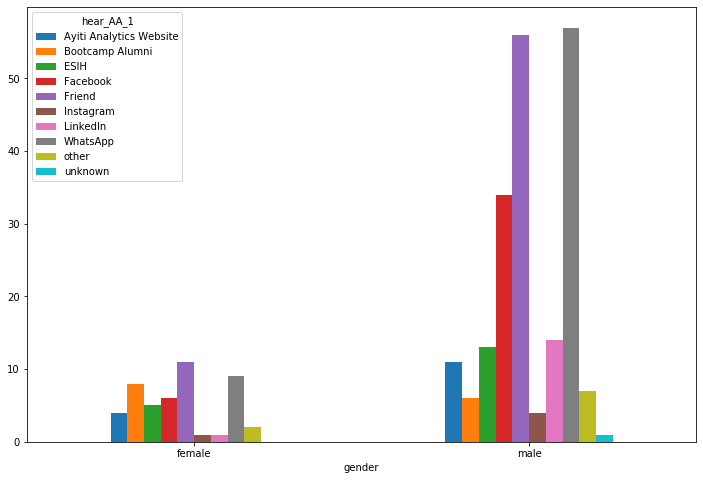

In [39]:
#here
my_pivot2 =  pd.pivot_table(data=result,index="gender",columns="hear_AA_1",values ="quest_id",aggfunc="count")
result["male"] =result["gender"].apply(lambda x: 1 if x == "male" else 0)
result["female"] =result["gender"].apply(lambda x: 1 if x=="female" else 0)

# Cross tabulation between GENDER and communication channel
CrosstabResult=pd.crosstab(index=result.gender,columns=result.hear_AA_1)
print(CrosstabResult)
 
# Grouped bar chart between GENDER and communication channel
CrosstabResult.plot.bar(figsize=(12,8), rot=0)

In [40]:
from scipy.stats import chi2_contingency
stat, p, dof,s= chi2_contingency(com_table) 
print("p value: " + str(p)) 
if p <= 0.05: 
  print('Reject NULL HYPOTHESIS') 
else: 
  print('ACCEPT NULL HYPOTHESIS') 

p value: 1.2931351228431785e-10
Reject NULL HYPOTHESIS


### 16 Use the same method to display plot and know if is there any dependency between communication channels and Bootcamp Insterest?

gender,female,male,All
hear_AA_1,,,
Ayiti Analytics Website,4,11,15
Bootcamp Alumni,8,6,14
ESIH,5,13,18
Facebook,6,34,40
Friend,11,56,67
Instagram,1,4,5
LinkedIn,1,14,15
WhatsApp,9,57,66
other,2,7,9


p value: 0.5496916447443122
ACCEPT NULL HYPOTHESIS


<Figure size 360x1080 with 0 Axes>

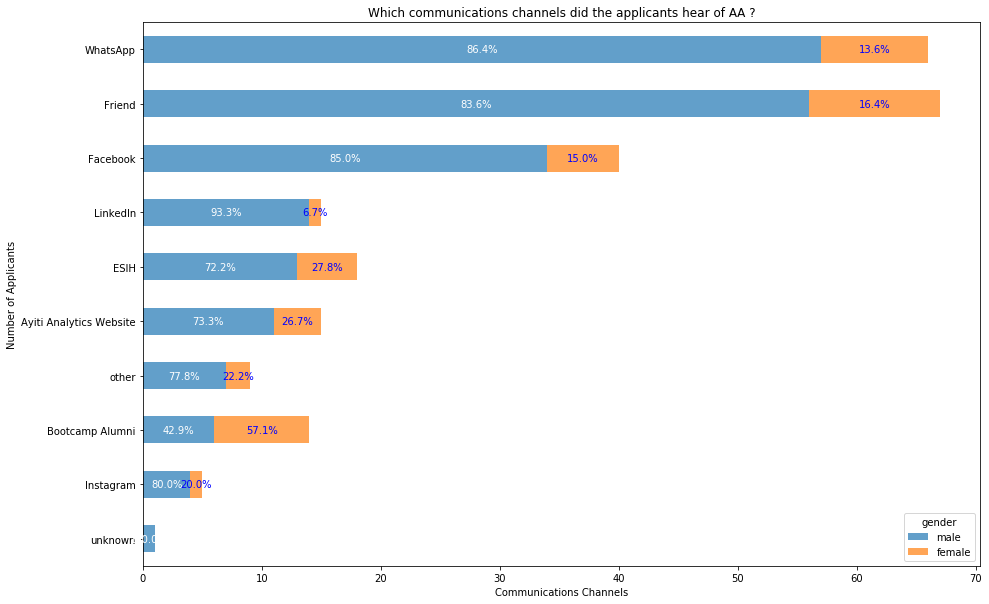

gender,female,male,All
hear_AA_1,,,
Ayiti Analytics Website,4,11,15
Bootcamp Alumni,8,6,14
ESIH,5,13,18
Facebook,6,34,40
Friend,11,56,67
Instagram,1,4,5
LinkedIn,1,14,15
WhatsApp,9,57,66
other,2,7,9


In [41]:
# here your codes
def my_chisqure_test(data=result,columns=None,significance_level=0.05,figsize=(5,5),heatmap=False):
  result1  = pd.pivot_table(data=data,index=columns[0],columns=columns[1],values="Age",aggfunc="count",fill_value=0,margins = True)
  display(result1)
  stat, p, dof,s= chi2_contingency(result1) 
  print("p value: " + str(p)) 
  if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
  else: 
    print('ACCEPT NULL HYPOTHESIS') 
  # Force the aspect ratio of the blocks to be equal using "square" parameter
  plt.figure(figsize=figsize)
  if heatmap:
    ax = sns.heatmap(result1,cmap="YlGnBu", linewidths=.5,
    annot=True ,annot_kws={'size':14} ,fmt=".1f" , cbar=True ,square = True)
    plt.yticks(rotation=0)
  else:
    values = result1.iloc[:-1,:].sort_values(by =('male'),ascending=True)
    ax =values.sort_values(by =('male'),ascending=True)[[('male'),('female')]].plot(kind="barh",figsize=(15,10),stacked= True,alpha =0.7)
    ylab = ax.set_ylabel('Number of Applicants')
    xlab = ax.set_xlabel('Communications Channels')
    title = ax.set_title('Which communications channels did the applicants hear of AA ?')

    index =0
    for male, female ,total in zip(values[('male')],values[('female')], values[('All')]):
      if male != total and  female != total  :
        ax.text(male/2 ,
                index,
                str(np.round((male/total)*100,1)) + "%",
                fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
                )
        ax.text(male + female/2 ,
              index,
              str(np.round((female/total)*100,1)) + "%",
              fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
            )
      elif female == total:
        ax.text(female/2 ,
            index,
            str(np.round((female/total)*100,1)) + "%",
            fontdict=dict(color='blue',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )
      else:
        ax.text(male/2 ,
            index,
            str(np.round((male/total)*100,1)) + "%",
            fontdict=dict(color='white',fontsize=10,horizontalalignment="center",verticalalignment="center")
          )       
   
    
      index+=1
  plt.show()
  return result1
my_chisqure_test(result,columns=['hear_AA_1','gender'],significance_level=0.05,figsize=(5,15),heatmap=False)  

### 17.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender 

Here are some communication strategies: 
- For the friends, we have to make sure that the objective and the interest that Ayiti Analytiics has aroused in them is always the same so that they become ambassadors of Ayiti Analytics.
- Whatsapp allows an efficient communication between Ayiti Analytics and the interested parties. In order to develop our communication campaign we first need to create a brand persona. People prefer to communicate with other people, not an impersonal company. So, to undertake a successful WhatsApp marketing, you need to form your brand image. Quizzes and challenges around data science: a very original way to recruit the young creative profiles you need. 
-On facebook and instagram, we have to make sure that people spend a lot of time on our page so we have to play with the humor and mood of others so they will return to our page regularly.  Then we must be visual
Opting for an attractive cover image and a recognizable profile picture among others, is important, even essential. But this is not enough to be visual. It is well known that the endless news feed of Facebook is scrolled very quickly. The Internet user or the mobile user sees a multitude of information scrolling before his eyes, of which he retains only a tiny part. The objective is to attract to its content rather than to others. This is where visuals come into play. Several studies prove that publications with images are those that generate the most engagement.
- Ayiti analytics website: The site must be as dynanic as possible allowing a person to easily understand its objectives. For this, we need two messages, the first one short like "data science the job of the future" and the other one long putting in phase the fact of participating to the change, of being a pioneer in a domain unknown in Haiti


### 18.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender

Here are some communication strategies: 
- For the friends, we have to make sure that the objective and the interest that Ayiti Analytiics has aroused in them is always the same so that they become ambassadors of Ayiti Analytics.
- Whatsapp allows an efficient communication between Ayiti Analytics and the interested parties. In order to develop our communication campaign we first need to create a brand persona. People prefer to communicate with other people, not an impersonal company. So, to undertake a successful WhatsApp marketing, you need to form your brand image. Quizzes and challenges around data science: a very original way to recruit the young creative profiles you need. 
-On facebook and instagram, we have to make sure that people spend a lot of time on our page so we have to play with the humor and mood of others so they will return to our page regularly.  Then we must be visual
Opting for an attractive cover image and a recognizable profile picture among others, is important, even essential. But this is not enough to be visual. It is well known that the endless news feed of Facebook is scrolled very quickly. The Internet user or the mobile user sees a multitude of information scrolling before his eyes, of which he retains only a tiny part. The objective is to attract to its content rather than to others. This is where visuals come into play. Several studies prove that publications with images are those that generate the most engagement.
- Ayiti analytics website: The site must be as dynanic as possible allowing a person to easily understand its objectives. For this, we need two messages, the first one short like "data science the job of the future" and the other one long putting in phase the fact of participating to the change, of being a pioneer in a domain unknown in Haiti


### 19. Calculate 
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=no)

In [42]:
result12  = pd.pivot_table(data=result[result['Paid'] == 'Yes'],columns='after_AA',index=['Paid','hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
result12 = result12 /result[result['Paid'] == 'Yes'].shape[0]
result12

after_AA                             Finding a job/internship  \
Paid hear_AA_1               gender                             
Yes  Ayiti Analytics Website male                    0.015385   
     Bootcamp Alumni         female                  0.015385   
                             male                    0.000000   
     ESIH                    male                    0.015385   
     Facebook                female                  0.000000   
                             male                    0.015385   
     Friend                  female                  0.015385   
                             male                    0.030769   
     Instagram               male                    0.015385   
     LinkedIn                female                  0.000000   
                             male                    0.015385   
     WhatsApp                female                  0.015385   
                             male                    0.046154   
     other                   female                  0.000000   
                             male                    0.000000   
All                                                  0.200000   

after_AA                             Improving my data analysis skills  \
Paid hear_AA_1               gender                                      
Yes  Ayiti Analytics Website male                             0.015385   
     Bootcamp Alumni         female                           0.015385   
                             male                             0.076923   
     ESIH                    male                             0.030769   
     Facebook                female                           0.030769   
                             male                             0.076923   
     Friend                  female                           0.030769   
                             male                             0.215385   
     Instagram               male                             0.000000   
     LinkedIn                female                           0.015385   
                             male                             0.015385   
     WhatsApp                female                           0.046154   
                             male                             0.046154   
     other                   female                           0.000000   
                             male                             0.015385   
All                                                           0.630769   

after_AA                             Mentorship  Switching careers  \
Paid hear_AA_1               gender                                  
Yes  Ayiti Analytics Website male      0.000000           0.000000   
     Bootcamp Alumni         female    0.000000           0.015385   
                             male      0.000000           0.000000   
     ESIH                    male      0.000000           0.000000   
     Facebook                female    0.000000           0.000000   
                             male      0.000000           0.000000   
     Friend                  female    0.000000           0.000000   
                             male      0.000000           0.000000   
     Instagram               male      0.000000           0.000000   
     LinkedIn                female    0.000000           0.000000   
                             male      0.000000           0.000000   
     WhatsApp                female    0.000000           0.000000   
                             male      0.000000           0.000000   
     other                   female    0.015385           0.000000   
                             male      0.000000           0.000000   
All                                    0.015385           0.015385   

after_AA                             Training to start my own company  \
Paid hear_AA_1               gender                                     
Yes  Ayiti Analytics Website male                            0.015385   
     Bootcamp Al

In [43]:
result123  = pd.pivot_table(data=result[result['Paid'] == 'no'],columns='after_AA',index=['Paid','hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
result123 = result123 /result[result['Paid'] == 'no'].shape[0]
result123

after_AA                             Finding a job/internship  \
Paid hear_AA_1               gender                             
no   Ayiti Analytics Website female                  0.000000   
                             male                    0.000000   
     Bootcamp Alumni         female                  0.010811   
                             male                    0.000000   
     ESIH                    female                  0.000000   
                             male                    0.005405   
     Facebook                female                  0.010811   
                             male                    0.037838   
     Friend                  female                  0.016216   
                             male                    0.021622   
     Instagram               female                  0.000000   
                             male                    0.005405   
     LinkedIn                male                    0.005405   
     WhatsApp                female                  0.000000   
                             male                    0.037838   
     other                   female                  0.000000   
                             male                    0.010811   
     unknown                 male                    0.000000   
All                                                  0.162162   

after_AA                             Improving my data analysis skills  \
Paid hear_AA_1               gender                                      
no   Ayiti Analytics Website female                           0.010811   
                             male                             0.032432   
     Bootcamp Alumni         female                           0.010811   
                             male                             0.000000   
     ESIH                    female                           0.016216   
                             male                             0.037838   
     Facebook                female                           0.000000   
                             male                             0.070270   
     Friend                  female                           0.021622   
                             male                             0.097297   
     Instagram               female                           0.000000   
                             male                             0.000000   
     LinkedIn                male                             0.043243   
     WhatsApp                female                           0.016216   
                             male                             0.108108   
     other                   female                           0.005405   
                             male                             0.010811   
     unknown                 male                             0.000000   
All                                                           0.481081   

after_AA                             Mentorship  Switching careers  \
Paid hear_AA_1               gender                                  
no   Ayiti Analytics Website female    0.000000           0.005405   
                             male      0.005405           0.005405   
     Bootcamp Alumni         female    0.000000           0.000000   
                             male      0.000000           0.000000   
     ESIH                    female    0.005405           0.000000   
                             male      0.000000           0.000000   
     Facebook                female    0.010811           0.000000   
                             male      0.005405           0.016216   
     Friend                  female    0.000000           0.000000   
                             male      0.005405           0.021622   
     Instagram               female    0.000000           0.000000   
                             male      0.000000           0.005405   
     LinkedIn                male      0.000000           0.005405   
     WhatsApp                

### 20 reduce 
* P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")
* P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")

In [44]:
# here your codes
m = pd.pivot_table(data=result,columns='after_AA',index=['hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
m=result[result['Paid'] == 'Yes'].shape[0]/m
g = result12*m
g.fillna(0)
display(g)
g.loc[pd.IndexSlice['Friend','male'],'Improving my data analysis skills']

after_AA                                  All  Finding a job/internship  \
hear_AA_1               gender Paid                                       
                               All        NaN                       NaN   
All                            NaN        NaN                       NaN   
Ayiti Analytics Website female NaN        NaN                       NaN   
                        male   Yes   0.272727                  1.000000   
Bootcamp Alumni         female Yes   0.375000                  0.333333   
                        male   Yes   0.833333                       NaN   
ESIH                    female NaN        NaN                       NaN   
                        male   Yes   0.307692                  0.500000   
Facebook                female Yes   0.333333                  0.000000   
                        male   Yes   0.205882                  0.125000   
Friend                  female Yes   0.272727                  0.250000   
                        male   Yes   0.339286                  0.333333   
Instagram               female NaN        NaN                       NaN   
                        male   Yes   0.250000                  0.500000   
LinkedIn                female Yes   1.000000                       NaN   
                        male   Yes   0.142857                  0.500000   
WhatsApp                female Yes   0.444444                  1.000000   
                        male   Yes   0.157895                  0.300000   
other                   female Yes   0.500000                       NaN   
                        male   Yes   0.142857                  0.000000   
unknown                 male   NaN        NaN                       NaN   

after_AA                             Improving my data analysis skills  \
hear_AA_1               gender Paid                                      
                               All                                 NaN   
All                            NaN                                 NaN   
Ayiti Analytics Website female NaN                                 NaN   
                        male   Yes                            0.142857   
Bootcamp Alumni         female Yes                            0.333333   
                        male   Yes                            1.000000   
ESIH                    female NaN                                 NaN   
                        male   Yes                            0.222222   
Facebook                female Yes                            1.000000   
                        male   Yes                            0.277778   
Friend                  female Yes                            0.333333   
                        male   Yes                            0.437500   
Instagram               female NaN                                 NaN   
                        male   Yes                                 NaN   
LinkedIn                female Yes                            1.000000   
                        male   Yes                            0.111111   
WhatsApp                female Yes                            0.500000   
                        male   Yes                            0.130435   
other                   female Yes                            0.000000   
                        male   Yes                            0.333333   
unknown                 male   NaN                                 NaN   

after_AA                             Mentorship  Switching careers  \
hear_AA_1               gender Paid                                  
                               All          NaN                NaN   
All                            NaN          NaN                NaN   
Ayiti Analytics Website female NaN          NaN                NaN   
                        male   Yes          0.0                0.0   
Bootcamp Alumni         female Yes          NaN                1.0   
                        male   Yes          NaN                NaN   
ESIH       

Paid
Yes    0.4375
Name: Improving my data analysis skills, dtype: float64

In [326]:
n = pd.pivot_table(data=final_tab,columns='after_AA',index=['hear_AA_1','gender'],values="quest_id",aggfunc="count",fill_value=0,margins = True)
n=final_tab[final_tab['Paid'] == 'no'].shape[0]/n
h = result123*n
display(h)
h.loc[pd.IndexSlice['Friend','male'],'Improving my data analysis skills']

after_AA                             Finding a job/internship  \
hear_AA_1               gender Paid                             
                               All                        NaN   
All                            NaN                        NaN   
Ayiti Analytics Website female no                         NaN   
                        male   no                    0.000000   
Bootcamp Alumni         female no                    0.666667   
                        male   no                         NaN   
ESIH                    female no                         NaN   
                        male   no                    0.500000   
Facebook                female no                    1.000000   
                        male   no                    0.875000   
Friend                  female no                    0.750000   
                        male   no                    0.666667   
Instagram               female no                         NaN   
                        male   no                    0.500000   
LinkedIn                female NaN                        NaN   
                        male   no                    0.500000   
WhatsApp                female no                    0.000000   
                        male   no                    0.700000   
other                   female no                         NaN   
                        male   no                    1.000000   
unknown                 male   no                         NaN   

after_AA                             Improving my data analysis skills  \
hear_AA_1               gender Paid                                      
                               All                                 NaN   
All                            NaN                                 NaN   
Ayiti Analytics Website female no                             1.000000   
                        male   no                             0.857143   
Bootcamp Alumni         female no                             0.666667   
                        male   no                             0.000000   
ESIH                    female no                             1.000000   
                        male   no                             0.777778   
Facebook                female no                             0.000000   
                        male   no                             0.722222   
Friend                  female no                             0.666667   
                        male   no                             0.562500   
Instagram               female no                                  NaN   
                        male   no                                  NaN   
LinkedIn                female NaN                                 NaN   
                        male   no                             0.888889   
WhatsApp                female no                             0.500000   
                        male   no                             0.869565   
other                   female no                             1.000000   
                        male   no                             0.666667   
unknown                 male   no                                  NaN   

after_AA                             Mentorship  Switching careers  \
hear_AA_1               gender Paid                                  
                               All          NaN                NaN   
All                            NaN          NaN                NaN   
Ayiti Analytics Website female no           NaN                1.0   
                        male   no           1.0                1.0   
Bootcamp Alumni         female no           NaN                0.0   
                        male   no           NaN                NaN   
ESIH                    female no           1.0                NaN   
                        male   no           NaN                NaN   
Facebook                female no           1.0                NaN   
                        male   

Paid
no    0.5625
Name: Improving my data analysis skills, dtype: float64

### Based on these findings, propose strategies to increase our sales?

To increase sales, you don't need to focus on all the communication channels, but only the most influential ones, because according to Pareto's law, if you focus on 20% of the channels you will get 80% of the results.